# Loading Libraries

All Python capabilities are not loaded to our working environment by default (even if they are already installed in your system). So, we import each and every library that we want to use. Sometimes we chose alias names for our libraries for the sake of our convenience for example we import tensorflow as tf and similarly the other libraries


In [1]:
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

# Loading Data


The CIFAR10 dataset is available in the TensorFlow only. Let's load the data:

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data    # To load the CIFAR10 10 classes dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

# Basic EDA

In [3]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[0].shape

(32, 32, 3)

Each image in the dataset is of shape 32X32x3 , 32x32 and x3 for (RGB)

In [5]:
# Take a look how one image looks like
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Only numbers! Can't understand what digit does it represent.

There is a function in matplotlib called as 'matshow()', it helps you to display the image of the array of numbers

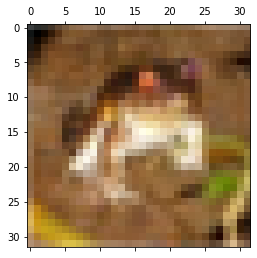

In [6]:
plt.matshow(X_train[0])


In [7]:
# we can use y_train to cross check
y_train[0]

array([6], dtype=uint8)

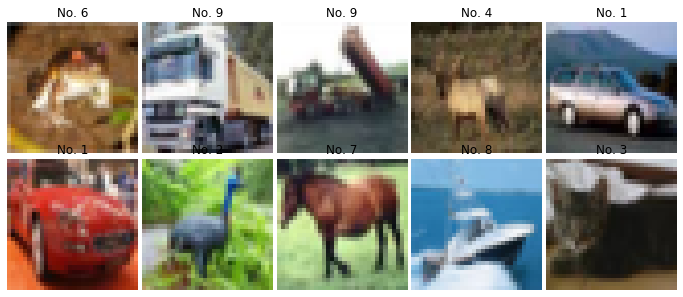

In [8]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()


# Data Preprocessing

Let's normalize our data (i.e. both X_train and X_test). Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.

But why to normalize?

The motivation to normalize is to achieve consistency in dynamic range for a set of data, signals, or images to avoid mental distraction and reduce the data redundancy. Also, normalizing the data can help you improve the model performance.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [10]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Flatten the Data

We simply convert a 2 dimensional data (i.e. one image data) to 1 dimensional.

Why to flatten data?

Before understanding why let's check the shape of the data

In [11]:
X_train.shape
# same for X_test

(50000, 32, 32, 3)

The data is 4 dimensional. The first value i.e. 60000 is nothing but the number of records or images in this case. The second and third dimension represent each individual image i.e. each image is of shape 28X28. and 3 for the RGB as color images.

Most of the the supervised learning algorithms that execute classification and regression tasks, as well as some deep learning models built for this purposes, are fed with two-dimensional data. Since we have our data as three-dimensional, we will need to flatten our data to make it two-dimensional.

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 32*32*3)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 32*32*3)

Now if you check the shape of our data, it should be 2 dimensional

In [20]:
X_train_flattened.shape

(50000, 3072)

# Building Models

## Defining the Model

In [21]:
# Defining the Model with 1 layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(3072,), activation='sigmoid')     # The input shape is 3072. 
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##  Fit the model

In [24]:
model.fit(X_train_flattened, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 8s 158us/sample - loss: 2.1587 - accuracy: 0.1295
Epoch 2/5
50000/50000 [==============================] - 5s 105us/sample - loss: 2.0918 - accuracy: 0.1148
Epoch 3/5
50000/50000 [==============================] - 6s 116us/sample - loss: 2.0286 - accuracy: 0.1064
Epoch 4/5
50000/50000 [==============================] - 6s 110us/sample - loss: 2.0027 - accuracy: 0.1006
Epoch 5/5
50000/50000 [==============================] - 6s 121us/sample - loss: 1.9819 - accuracy: 0.1179


## Evaluate the model on unseen data (i.e. X_test_flattened)

In [25]:
model.evaluate(X_test_flattened, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.944309383392334, 0.3038]

In [ ]:
# Model with 
# loss: 1.7960 - accuracy: 0.3038

In [26]:
# Defining the model with 2 layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(3072,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 118us/sample - loss: 1.8982 - accuracy: 0.3124
Epoch 2/5
50000/50000 [==============================] - 4s 83us/sample - loss: 1.7078 - accuracy: 0.3875
Epoch 3/5
50000/50000 [==============================] - 4s 87us/sample - loss: 1.6376 - accuracy: 0.4157
Epoch 4/5
50000/50000 [==============================] - 4s 83us/sample - loss: 1.5894 - accuracy: 0.4320
Epoch 5/5
50000/50000 [==============================] - 4s 80us/sample - loss: 1.5408 - accuracy: 0.4491


In [28]:
model.evaluate(X_test_flattened,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5503163179397583, 0.4463]

In [ ]:
#Model wwith 2 layers
# loss: 1.6464 - accuracy: 0.4463

In [16]:
from tensorflow.keras import datasets, layers, models

In [29]:
# Model with 3 CNN layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.5024 - accuracy: 0.4575 - val_loss: 1.2164 - val_accuracy: 0.5595
Epoch 2/20
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1370 - accuracy: 0.5964 - val_loss: 1.0786 - val_accuracy: 0.6203
Epoch 3/20
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.9856 - accuracy: 0.6537 - val_loss: 0.9715 - val_accuracy: 0.6604
Epoch 4/20
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.8847 - accuracy: 0.6881 - val_loss: 0.9447 - val_accuracy: 0.6693
Epoch 5/20
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.8076 - accuracy: 0.7152 - val_loss: 0.8982 - val_accuracy: 0.6870
Epoch 6/20
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.7511 - accuracy: 0.7350 - val_loss: 0.9311 - val_accuracy: 0.6830
Epoch 7/20
50000/50000 [==============================] 

10000/1 - 5s - loss: 1.7347 - accuracy: 0.7041


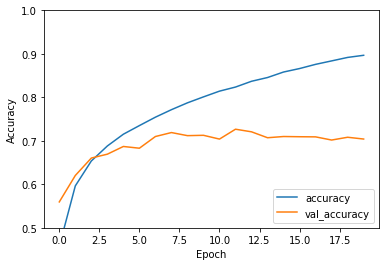

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [35]:
print(test_acc)

0.7041


In [ ]:
# Accuracy 71.5 leaderboard #4

In [37]:
# saving the model
save_dir = "/results/"
model_name = 'keras_cifar10_20epoches.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_cifar10_20epoches.h5 


In [ ]:
# new model to increase accuracy

In [19]:
from tensorflow.keras import datasets, layers, models, optimizers

In [18]:
# Model  with dropout augmenting 
model = models.Sequential()
# Input layer
# CNN > BatchNormalization > CNN > BatchNormalization > Pooling >Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
# CNN > BatchNormalization > CNN > BatchNormalization > Pooling >Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
# CNN > BatchNormalization > CNN > BatchNormalization > Pooling >Dropout
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
# FLATTERN => DENSE => RELU => DROPOUT
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# Output layer
model.add(layers.Dense(10, activation='softmax')) # 10 classes as output


In [23]:
# compile model
opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
# summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [25]:
# fit model
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 345s 7ms/sample - loss: 2.1951 - accuracy: 0.2522 - val_loss: 2.1220 - val_accuracy: 0.3352
Epoch 2/20
50000/50000 [==============================] - 389s 8ms/sample - loss: 2.0801 - accuracy: 0.3796 - val_loss: 2.0868 - val_accuracy: 0.3704
Epoch 3/20
50000/50000 [==============================] - 356s 7ms/sample - loss: 2.0310 - accuracy: 0.4304 - val_loss: 2.0162 - val_accuracy: 0.4460
Epoch 4/20
50000/50000 [==============================] - 338s 7ms/sample - loss: 1.9978 - accuracy: 0.4638 - val_loss: 2.0034 - val_accuracy: 0.4572
Epoch 5/20
50000/50000 [==============================] - 317s 6ms/sample - loss: 1.9721 - accuracy: 0.4905 - val_loss: 1.9632 - val_accuracy: 0.4971
Epoch 6/20
50000/50000 [==============================] - 315s 6ms/sample - loss: 1.9516 - accuracy: 0.5122 - val_loss: 1.9297 - val_accuracy: 0.5327
Epoch 7/20
50000/50000 [==========================

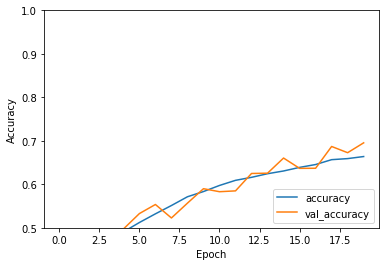

In [26]:
# Visualization:  Line Plots of Learning Curves for CIFAR-10 Dataset


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [28]:
# saving the model
save_dir = "results/"
model_name = 'tensor_cifar10_Baseline_IncreasingDropout_DataAugmentation_BatchNormalization.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at results/tensor_cifar10_Baseline_IncreasingDropout_DataAugmentation_BatchNormalization.h5 
